In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


# Own utility methods:
from mandelbrot import *
from sampling_methods import *

# 1.1
We create an image of the mandelbrot set by applying the mandelbrot iteration 1000 times to a grid of complex numbers and plotting the number of iterations until divergence for each pixel.

Final area estimation: 1.5114150047302246


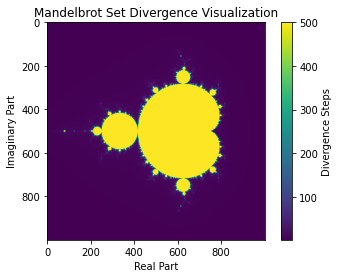

In [15]:

def plot_mandelbrot(num_div_steps, cmap='viridis', save_plot_as = 'mandelbrot_visualisation'):
    plt.imshow(num_div_steps, cmap=cmap)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.colorbar(label='Divergence Steps')
    plt.title('Mandelbrot Set Divergence Visualization')

    full_path = os.path.join('plots', save_plot_as)
    plt.savefig(full_path, dpi=600)
    plt.show()
    
    

resolution = 1000
C = generate_complex_grid(resolution)
num_div_steps, _ = compute_mandelbrot_torch(C, max_steps=500, bound=10)
plot_mandelbrot(num_div_steps)

We also zoom into the Mandelbrot set revealing the  intricate, self-similar patterns, enhancing visual understanding of its fractal nature.

The names of the parts we zoom into:
- Seahorse Valley
- Elephants Valley
- Spiral Region

Final area estimation: 7.3240110000000005


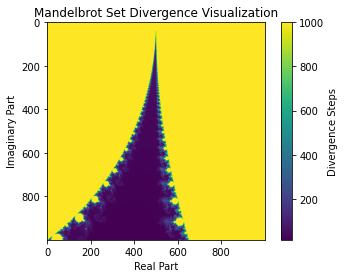

In [16]:
# Modify these parameters for zooming
zoom_center = (-0.75, 0.1)  # Seahorse Valley
zoom_level = 0.1  # Smaller values for deeper zooms

# Compute ranges for the zoomed-in area
real_range = (zoom_center[0] - zoom_level, zoom_center[0] + zoom_level)
imag_range = (zoom_center[1] - zoom_level, zoom_center[1] + zoom_level)

# Generate the grid with the new zoomed-in ranges
resolution = 1000
C = generate_complex_grid(resolution, real_range=real_range, imag_range=imag_range)

# Compute the Mandelbrot set with a high number of steps for detailed structure
num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=1000, bound=10)

# Plot the result
plot_mandelbrot(num_div_steps, cmap='viridis', save_plot_as= 'visualisation_seahorse')  

Final area estimation: 6.245208


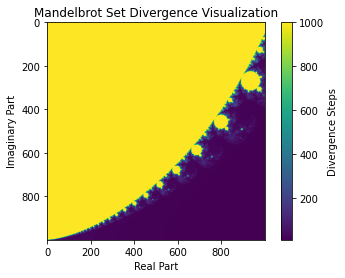

In [17]:
# Modify these parameters for zooming
zoom_center = (0.3, -0.05) # Elephants Valley
zoom_level = 0.05  # Smaller values for deeper zooms 

# Compute ranges for the zoomed-in area
real_range = (zoom_center[0] - zoom_level, zoom_center[0] + zoom_level)
imag_range = (zoom_center[1] - zoom_level, zoom_center[1] + zoom_level)

# Generate the grid with the new zoomed-in ranges
resolution = 1000
C = generate_complex_grid(resolution, real_range=real_range, imag_range=imag_range)

# Compute the Mandelbrot set with a high number of steps for detailed structure
num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=1000, bound=10)

# Plot the result
plot_mandelbrot(num_div_steps, cmap='viridis', save_plot_as= 'visualisation_elephant') 

Final area estimation: 3.4035435


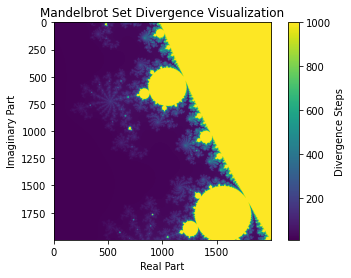

In [18]:
# Modify these parameters for zooming
zoom_center = (-0.7, 0.3) # Spiral Region
zoom_level = 0.05  # Smaller values for deeper zooms 

# Compute ranges for the zoomed-in area
real_range = (zoom_center[0] - zoom_level, zoom_center[0] + zoom_level)
imag_range = (zoom_center[1] - zoom_level, zoom_center[1] + zoom_level)

# Generate the grid with the new zoomed-in ranges
resolution = 2000
C = generate_complex_grid(resolution, real_range=real_range, imag_range=imag_range)

# Compute the Mandelbrot set with a high number of steps for detailed structure
num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=1000, bound=10)

# Plot the result
plot_mandelbrot(num_div_steps, cmap='viridis', save_plot_as= 'visualisation_spiral') 

# 1.2
Convergence of the Area estimate with the number of iterations

In [ ]:

def plot_mandelbrot_area_difference(sample_sizes, iteration_count, skip_iterations = 0, save_plot_as = 'mandelbrot-convergence-iterations.png'):
    area_estimates = np.zeros((len(sample_sizes), iteration_count))

    for i, num_samples in enumerate(sample_sizes):
        C = uniform_random_sampling(num_samples, (-2,2),(-2,2))
        _, area_est = compute_mandelbrot_torch(C, iteration_count, area_factor=16 )
        area_estimates[i,:] = area_est

    plt.figure(figsize=(10, 5))
    for i, samples in enumerate(sample_sizes):
        plt.plot(np.arange(iteration_count)[skip_iterations:]+1, np.abs(area_estimates[i,-1] - area_estimates[i, skip_iterations:]), label=f's = {samples}')

    plt.xlabel('Iteration j')
    plt.ylabel(r'$A_{j, s} - A_{i, s}$')
    plt.title('Convergence of Estimated Area depending on Iteration Count')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    
    full_path = os.path.join('plots', save_plot_as)
    plt.savefig(full_path, dpi=600)
    plt.show()

    return area_estimates




# Parameters used for the plot in the report (runs for over 1 hour):
# sample_sizes = [1000, 10000, 100000, 1000000]
# iteration_count = 5000000

# example with lower run time
sample_sizes = [1000, 10000, 100000]
iteration_count = 10000

plot_mandelbrot_area_difference(sample_sizes, iteration_count)

Hoeffding's inequality:

for a series of independent random variables $X_i \in [0,1]$  writing $S_n = \frac1n\sum_{i=1}^n X_i$
\begin{align}
     P(|S_n - E[S_n]| \geq \varepsilon) \leq 2 exp \left(-2\varepsilon^2 n\right) &\leq \delta\\
     {2\varepsilon^2n} &\leq -log(\delta / 2) \\
    \varepsilon &\leq \sqrt{-\frac 1{2n} log(\delta / 2)}
\end{align}

Convergence with number of samples

In [ ]:
def plot_mandelbrot_area_difference_sample_count(sample_sizes, iteration_count, sampling_methods, method_titles, save_plot_as = 'images/mandelbrot-convergence-samples.png'):
    area_estimates = np.zeros((len(sampling_methods), len(sample_sizes)))

    for m, method in enumerate(sampling_methods):
        for i, num_samples in enumerate(sample_sizes):
            C = method(num_samples, (-2,2),(-2,2))
            _, area_est = compute_mandelbrot_torch(C, iteration_count, area_factor=16 )
            area_estimates[m, i] = area_est[-1]



    plt.figure(figsize=(10, 5))
    
    markers=['o', 'v', '^','s', 'p' ]   

    for m, method in enumerate(sampling_methods):
        plt.plot(sample_sizes[:-1], np.abs(area_estimates[m, :-1] - area_estimates[m, -1]), label=method_titles[m], marker = markers[m] )

    plt.xlabel('Sample Size s')
    plt.ylabel(r'$A_{i, s} - A_{i, s_{max}}$')
    plt.title('Convergence of Estimated Area depending on Sample Size')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    
    full_path = os.path.join('plots', save_plot_as)
    plt.savefig(full_path, dpi=600)
    plt.show()

    return area_estimates



sample_sizes = np.logspace(3, 7, 20, base=10).astype(np.int64)
iteration_count = 10000
sampling_methods = [ uniform_random_sampling, latin_hypercube_sampling,  orthogonal_sampling]
method_titles = [ 'uniform random', 'latin hypercube', 'orthogonal']
area_estimates = plot_mandelbrot_area_difference_sample_count(sample_sizes, iteration_count, sampling_methods, method_titles)
print(area_estimates)

# 1.3
In this part we look at different sampling methods to estimate the size of the Mandelbrot set to compare.


 *Pure Random Sampling*

In [ ]:
def plot_sampling_method(C, title, max_steps=1000, area_factor=9, save_plot_as = 'sampling_method'):
    """
    Computes and plots Mandelbrot set divergence steps for a given complex array using a specified sampling method.

    Parameters:
    - C: 1D array of complex numbers representing the samples.
    - title: Title for the plot.
    - max_steps: Maximum number of iterations for Mandelbrot computation.
    - area_factor: Area factor for the computation.
    """
    num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=max_steps, area_factor=area_factor)

    rval, ival = C.real, C.imag
    plt.scatter(rval, ival, s=0.1, alpha=0.1, c=num_div_steps)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.colorbar(label='Divergence Steps')

    full_path = os.path.join('plots', save_plot_as)
    plt.savefig(full_path, dpi=600)
    plt.show()

def pure_random_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs pure random sampling for the Mandelbrot set.

    Parameters:
    - num_samples: Number of samples.
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    rval = np.random.uniform(real_range[0], real_range[1], num_samples)
    ival = np.random.uniform(imag_range[0], imag_range[1], num_samples)
    return rval + 1.j * ival

# Example Usage
C = pure_random_sampling(num_samples=100000)
plot_sampling_method(C, "Mandelbrot Set Divergence Steps (Pure Random Sampling)", save_plot_as = 'pure_random_sampling')

*Orthogonal Sampling*

In [ ]:
def orthogonal_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs orthogonal sampling for the Mandelbrot set, suited for Python while following the logic of the provided C code.

    Parameters:
    - num_samples: Total number of samples to generate (must be a perfect square).
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    major = int(np.round(np.sqrt(num_samples)))
    num_samples = major * major
    print(f"Adjusted num_samples to {num_samples} to ensure it is a perfect square close to the original value.")

    x_indices = np.arange(major)
    y_indices = np.arange(major)

    samples = []
    for i in range(major):
        np.random.shuffle(x_indices)
        np.random.shuffle(y_indices)

        for j in range(major):
            rand_real = np.random.uniform(0, 1)
            rand_imag = np.random.uniform(0, 1)

            x = real_range[0] + (real_range[1] - real_range[0]) * ((i + rand_real) / major)
            y = imag_range[0] + (imag_range[1] - imag_range[0]) * ((j + rand_imag) / major)

            samples.append(complex(x, y))

    return np.array(samples)


# Example Usage
C = orthogonal_sampling(num_samples=100000)
plot_sampling_method(C, "Mandelbrot Set Divergence Steps (Orthogonal Sampling)", save_plot_as='orthogonal_sampling')

*Latin HyperCube Sampling*

In [ ]:
def latin_hypercube_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs Latin Hypercube sampling for the Mandelbrot set.

    Parameters:
    - num_samples: Number of samples.
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    sampler = LatinHypercube(d=2)
    lhs_samples = sampler.random(n=num_samples)

    scaled_samples = scale(lhs_samples, [real_range[0], imag_range[0]], [real_range[1], imag_range[1]])
    rval, ival = scaled_samples[:, 0], scaled_samples[:, 1]
    return rval + 1.j * ival

# Example Usage
C = latin_hypercube_sampling(num_samples=100000)
plot_sampling_method(C, "Mandelbrot Set Divergence Steps (Latin Hypercube Sampling)", save_plot_as = 'latin_hypercube_sampling')